In [22]:
import pandas as pd

# Cargar el archivo CSV
data_bernardo = pd.read_csv('./DatosRedes/bernardoArevalo.csv', delimiter=",",
                   quoting=2)
data_bernardo.head()


data_sandra = pd.read_csv('./DatosRedes/sandraTorres.csv', delimiter=",",
                     quoting=2)
data_sandra.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0.0,1.701686e+18,1.701686e+18,https://twitter.com/Yeya16155804/status/170168...,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,@bernardosilvagt @BArevalodeLeon @DrGiammattei...,0.0,0.0,...,NaN,NaN,NaN,1.701683e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1.0,1.701686e+18,1.701686e+18,https://twitter.com/Palomin17772524/status/170...,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...,0.0,0.0,...,NaN,NaN,NaN,1.701685e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2.0,1.701176e+18,1.701176e+18,https://twitter.com/iRizhao/status/17011762090...,2023-09-11 10:09:49+00:00,"{'id': 1533663614770421761, 'id_str': '1533663...",en,The 2023 National Race Walking Championship &a...,5.0,34.0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3.0,1.701685e+18,1.701685e+18,https://twitter.com/_awskl/status/170168488908...,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...,1.0,0.0,...,NaN,NaN,NaN,1.701684e+18,"{'id': 1420560045323038720, 'username': 'Palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
4,4.0,1.701685e+18,1.701685e+18,https://twitter.com/Mr_andrew89/status/1701684...,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...,0.0,0.0,...,NaN,NaN,NaN,1.701329e+18,"{'id': 310913844, 'username': 'ASolaresM', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


## LIMPIEZA Y PREPROCESAMIENTO DE DATOS 



In [23]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Descargar la lista de stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def preprocess_tweet(tweet):
    # Convertir a minúsculas
    tweet = tweet.lower()
    
    # Quitar URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Quitar caracteres de usuario y hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    
    # Quitar signos de puntuación
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Quitar stopwords y números
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words and not word.isnumeric()])
    
    return tweet

# Aplicar preprocesamiento a los tweets
data_bernardo['processed_tweet'] = data_bernardo['rawContent'].apply(preprocess_tweet)
data_sandra['processed_tweet'] = data_sandra['rawContent'].apply(preprocess_tweet)

# Mostrar los tweets preprocesados
processed_bernardo_head = data_bernardo[['rawContent', 'processed_tweet']].head()
processed_sandra_head = data_sandra[['rawContent', 'processed_tweet']].head()

processed_bernardo_head, processed_sandra_head


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(                                          rawContent  \
 0  @AnonGTReloaded @msemillagt @BArevalodeLeon ja...   
 1  @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...   
 2  Paciente de 39 años, dolor lumbar de 1 año tra...   
 3  @VicZacariasGT @soy_502 @BArevalodeLeon @msemi...   
 4  @Igor_Bitkov No le sigan el juego a este ruso ...   
 
                                      processed_tweet  
 0  jajajajajajajaja pisen deje hartos tanta ignor...  
 1  dos veces repitió actuando margen ley seguro t...  
 2  paciente años dolor lumbar año tras caída hizo...  
 3                     compa alucina puro net pareces  
 4  sigan juego ruso invasor enero solicitamos ret...  ,
                                           rawContent  \
 0  @bernardosilvagt @BArevalodeLeon @DrGiammattei...   
 1  @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...   
 2  The 2023 National Race Walking Championship &a...   
 3  @Palomin17772524 @mjcabrerar @BArevalodeLeon @...   
 4  @ASolaresM @Mike051270 @BAreva

## ANALISIS EXPLORATORIO 

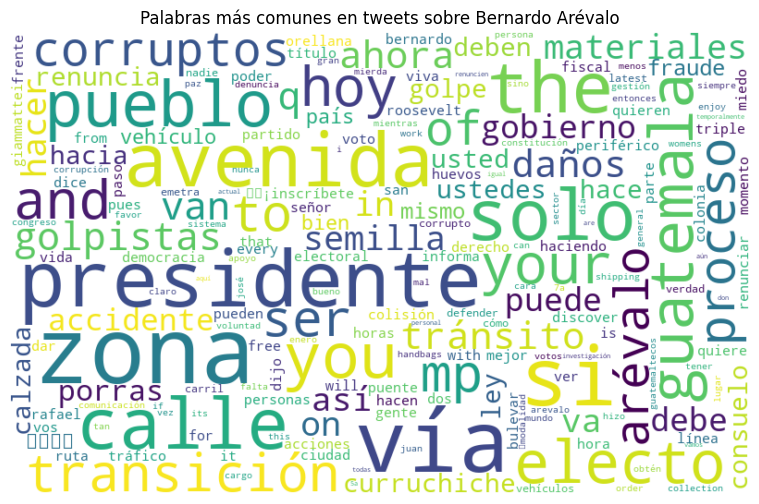

{'total_tweets': 4212,
 'avg_likes': 256.9669990503324,
 'avg_retweets': 53.50213675213675,
 'avg_replies': 28.675213675213676,
 'most_common_words': [('zona', 530),
  ('vía', 459),
  ('si', 412),
  ('presidente', 377),
  ('avenida', 340),
  ('the', 309),
  ('solo', 305),
  ('calle', 303),
  ('pueblo', 251),
  ('you', 244)]}

In [24]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Actualizar la función para usar la columna correcta y re-ejecutar el análisis exploratorio
def exploratory_analysis_updated(data, candidate_name):
    # Estadísticas básicas
    total_tweets = len(data)
    avg_likes = data['likeCount'].mean()
    avg_retweets = data['retweetCount'].mean()
    avg_replies = data['replyCount'].mean()
    
    # Palabras más comunes
    words = ' '.join(data['processed_tweet']).split()
    counter = Counter(words)
    most_common_words = counter.most_common(10)
    
    # Wordcloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, background_color='white').generate_from_frequencies(counter)
    
    plt.figure(figsize=(14, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palabras más comunes en tweets sobre {candidate_name}')
    plt.show()
    
    return {
        'total_tweets': total_tweets,
        'avg_likes': avg_likes,
        'avg_retweets': avg_retweets,
        'avg_replies': avg_replies,
        'most_common_words': most_common_words
    }

# Análisis exploratorio actualizado para Bernardo Arévalo
bernardo_analysis_updated = exploratory_analysis_updated(data_bernardo, "Bernardo Arévalo")
bernardo_analysis_updated



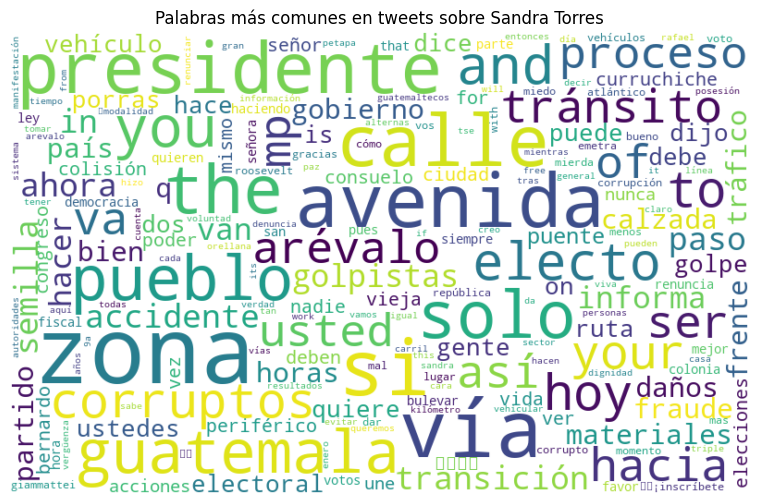

{'total_tweets': 5784,
 'avg_likes': 185.4640387275242,
 'avg_retweets': 38.41130705394191,
 'avg_replies': 19.563796680497926,
 'most_common_words': [('zona', 757),
  ('vía', 542),
  ('si', 506),
  ('avenida', 470),
  ('calle', 434),
  ('presidente', 427),
  ('the', 381),
  ('solo', 371),
  ('pueblo', 325),
  ('guatemala', 301)]}

In [25]:
# Análisis exploratorio actualizado para Bernardo Arévalo
sandra_analysis_updated = exploratory_analysis_updated(data_sandra, "Sandra Torres")
sandra_analysis_updated

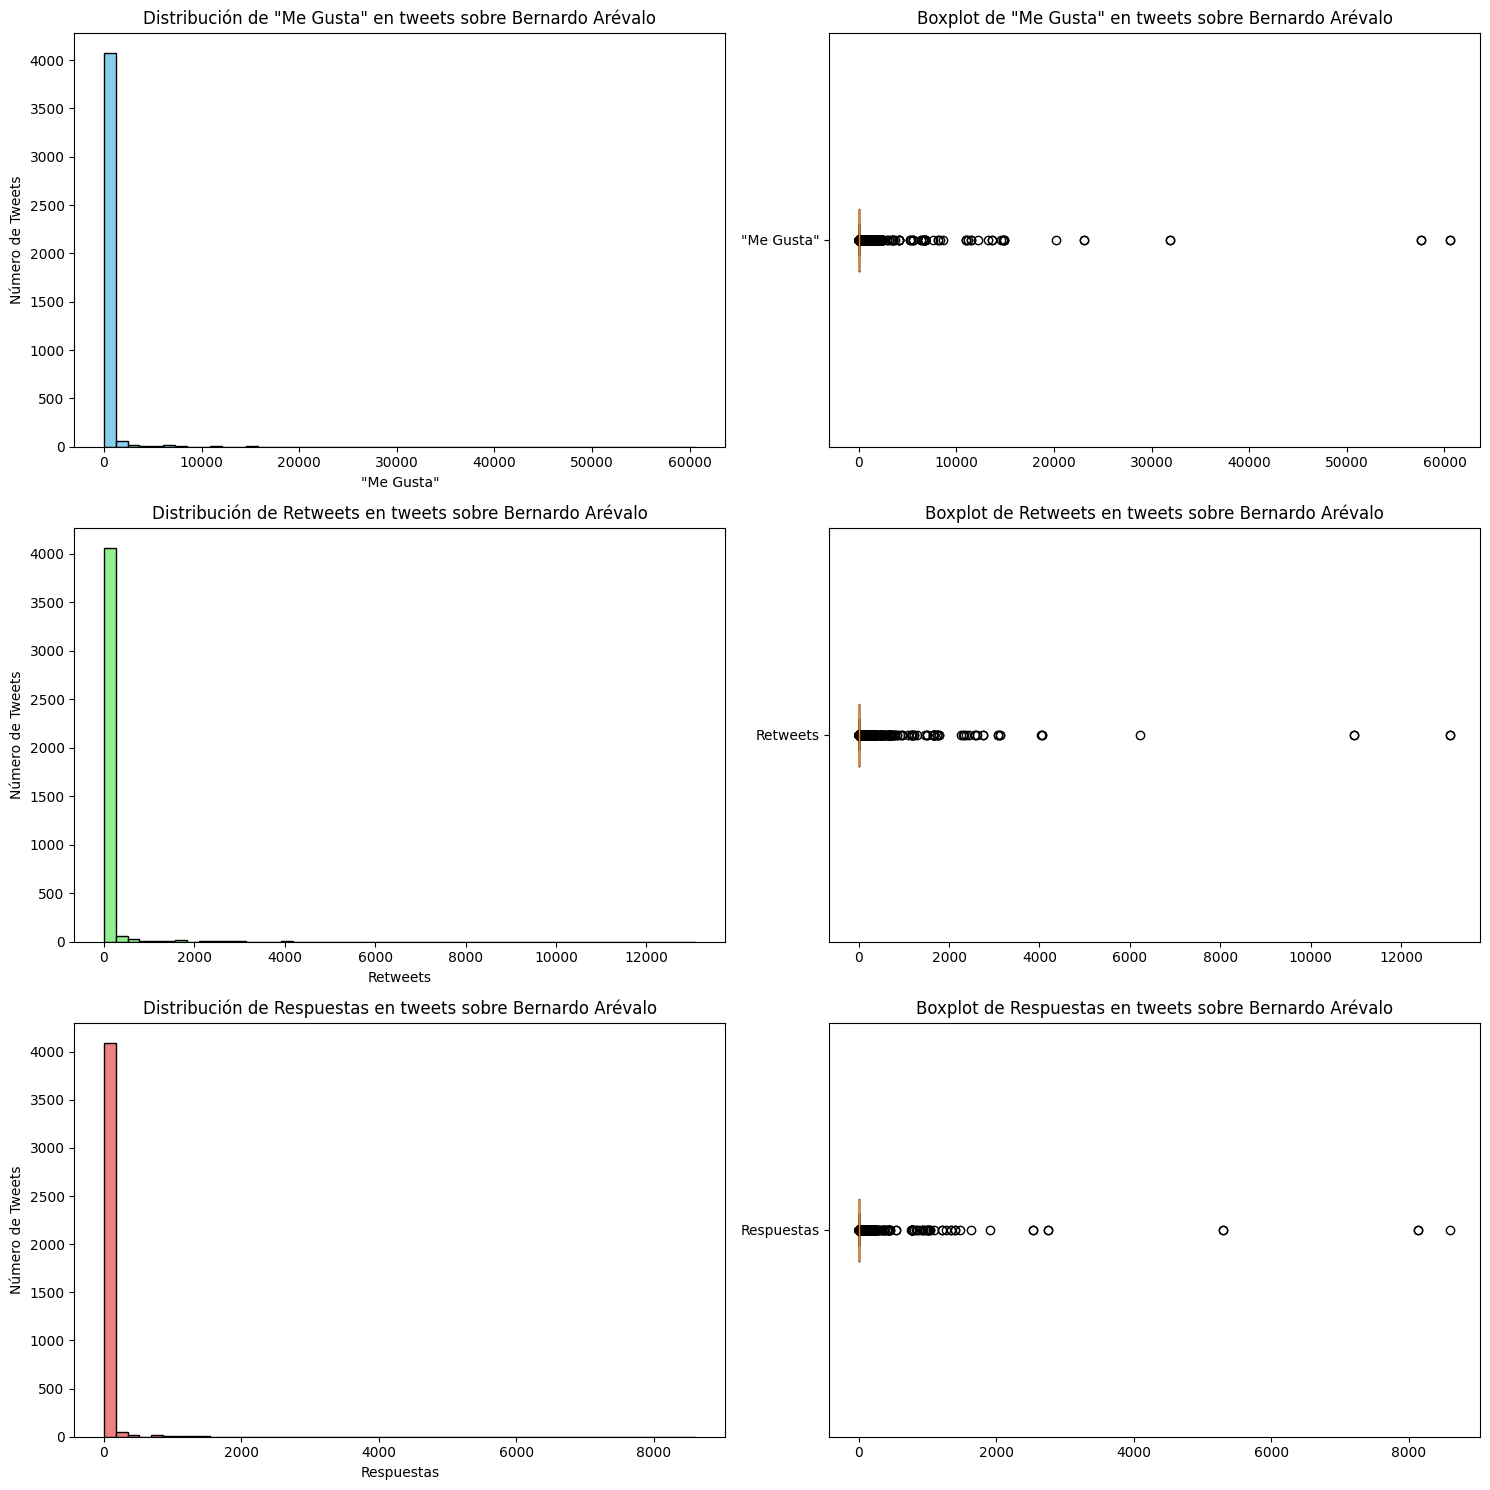

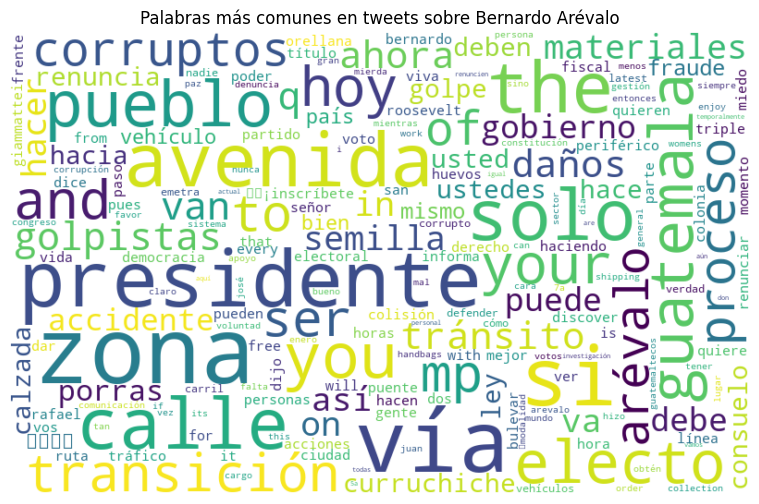

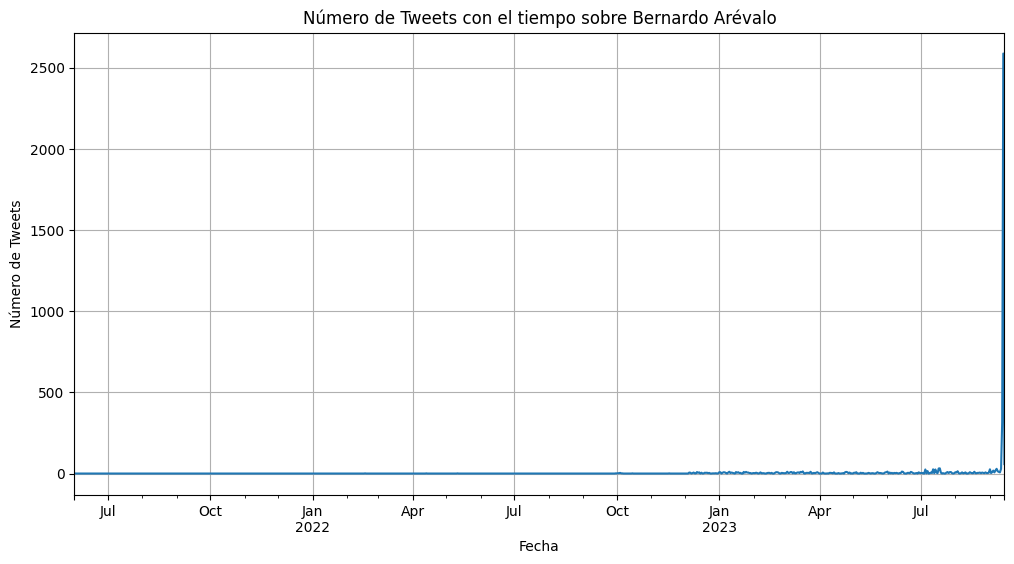

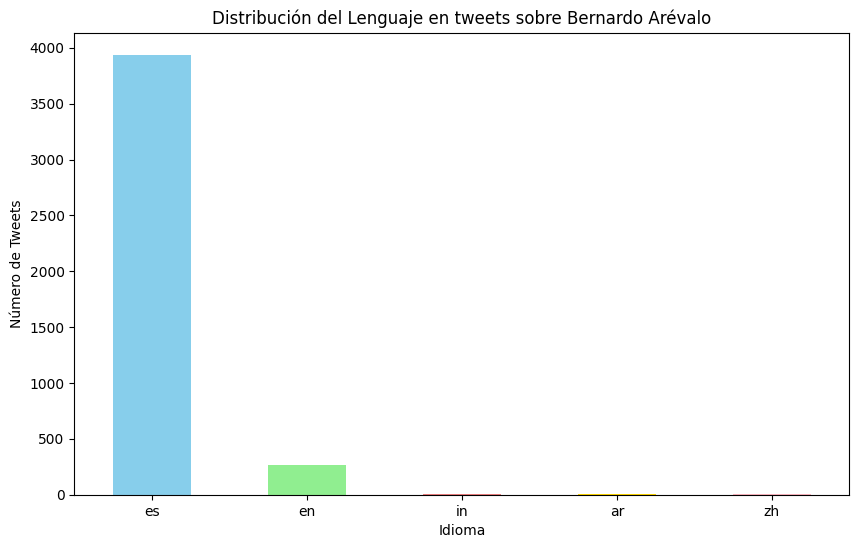

{'total_tweets': 4212,
 'avg_likes': 256.9669990503324,
 'avg_retweets': 53.50213675213675,
 'avg_replies': 28.675213675213676}

In [31]:
# Función actualizada para realizar un análisis exploratorio completo que incluye boxplots
def complete_exploratory_analysis_with_boxplots(data, candidate_name, column_name):
    # Estadísticas Descriptivas
    total_tweets = len(data)
    avg_likes = data['likeCount'].mean()
    avg_retweets = data['retweetCount'].mean()
    avg_replies = data['replyCount'].mean()
    
    # Histogramas y Boxplots para visualizar la distribución de "me gusta", retweets y respuestas
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))
    
    # Histogramas
    ax[0][0].hist(data['likeCount'], bins=50, color='skyblue', edgecolor='black')
    ax[0][0].set_title(f'Distribución de "Me Gusta" en tweets sobre {candidate_name}')
    ax[0][0].set_xlabel('"Me Gusta"')
    ax[0][0].set_ylabel('Número de Tweets')
    
    ax[1][0].hist(data['retweetCount'], bins=50, color='lightgreen', edgecolor='black')
    ax[1][0].set_title(f'Distribución de Retweets en tweets sobre {candidate_name}')
    ax[1][0].set_xlabel('Retweets')
    ax[1][0].set_ylabel('Número de Tweets')
    
    ax[2][0].hist(data['replyCount'], bins=50, color='lightcoral', edgecolor='black')
    ax[2][0].set_title(f'Distribución de Respuestas en tweets sobre {candidate_name}')
    ax[2][0].set_xlabel('Respuestas')
    ax[2][0].set_ylabel('Número de Tweets')
    
    # Boxplots
    ax[0][1].boxplot(data['likeCount'], vert=False)
    ax[0][1].set_title(f'Boxplot de "Me Gusta" en tweets sobre {candidate_name}')
    ax[0][1].set_yticklabels(['"Me Gusta"'])
    
    ax[1][1].boxplot(data['retweetCount'], vert=False)
    ax[1][1].set_title(f'Boxplot de Retweets en tweets sobre {candidate_name}')
    ax[1][1].set_yticklabels(['Retweets'])
    
    ax[2][1].boxplot(data['replyCount'], vert=False)
    ax[2][1].set_title(f'Boxplot de Respuestas en tweets sobre {candidate_name}')
    ax[2][1].set_yticklabels(['Respuestas'])
    
    plt.tight_layout()
    plt.show()
    
    # Palabras más comunes usando WordCloud
    words = ' '.join(data[column_name]).split()
    counter = Counter(words)
    
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, background_color='white').generate_from_frequencies(counter)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palabras más comunes en tweets sobre {candidate_name}')
    plt.show()
    
    # Análisis Temporal: Número de tweets con el tiempo
    data['date'] = pd.to_datetime(data['date'])
    tweets_over_time = data.resample('D', on='date').size()
    
    plt.figure(figsize=(12, 6))
    tweets_over_time.plot()
    plt.title(f'Número de Tweets con el tiempo sobre {candidate_name}')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Tweets')
    plt.grid(True)
    plt.show()
    
    # Distribución del Lenguaje
    language_distribution = data['lang'].value_counts().head(5)
    
    plt.figure(figsize=(10, 6))
    language_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
    plt.title(f'Distribución del Lenguaje en tweets sobre {candidate_name}')
    plt.xlabel('Idioma')
    plt.ylabel('Número de Tweets')
    plt.xticks(rotation=0)
    plt.show()
    
    # Return the basic statistics
    return {
        'total_tweets': total_tweets,
        'avg_likes': avg_likes,
        'avg_retweets': avg_retweets,
        'avg_replies': avg_replies
    }

# Análisis exploratorio completo para Bernardo Aréval
bernardo_analysis_complete_with_boxplots = complete_exploratory_analysis_with_boxplots(data_bernardo, "Bernardo Arévalo", 'processed_tweet')
bernardo_analysis_complete_with_boxplots



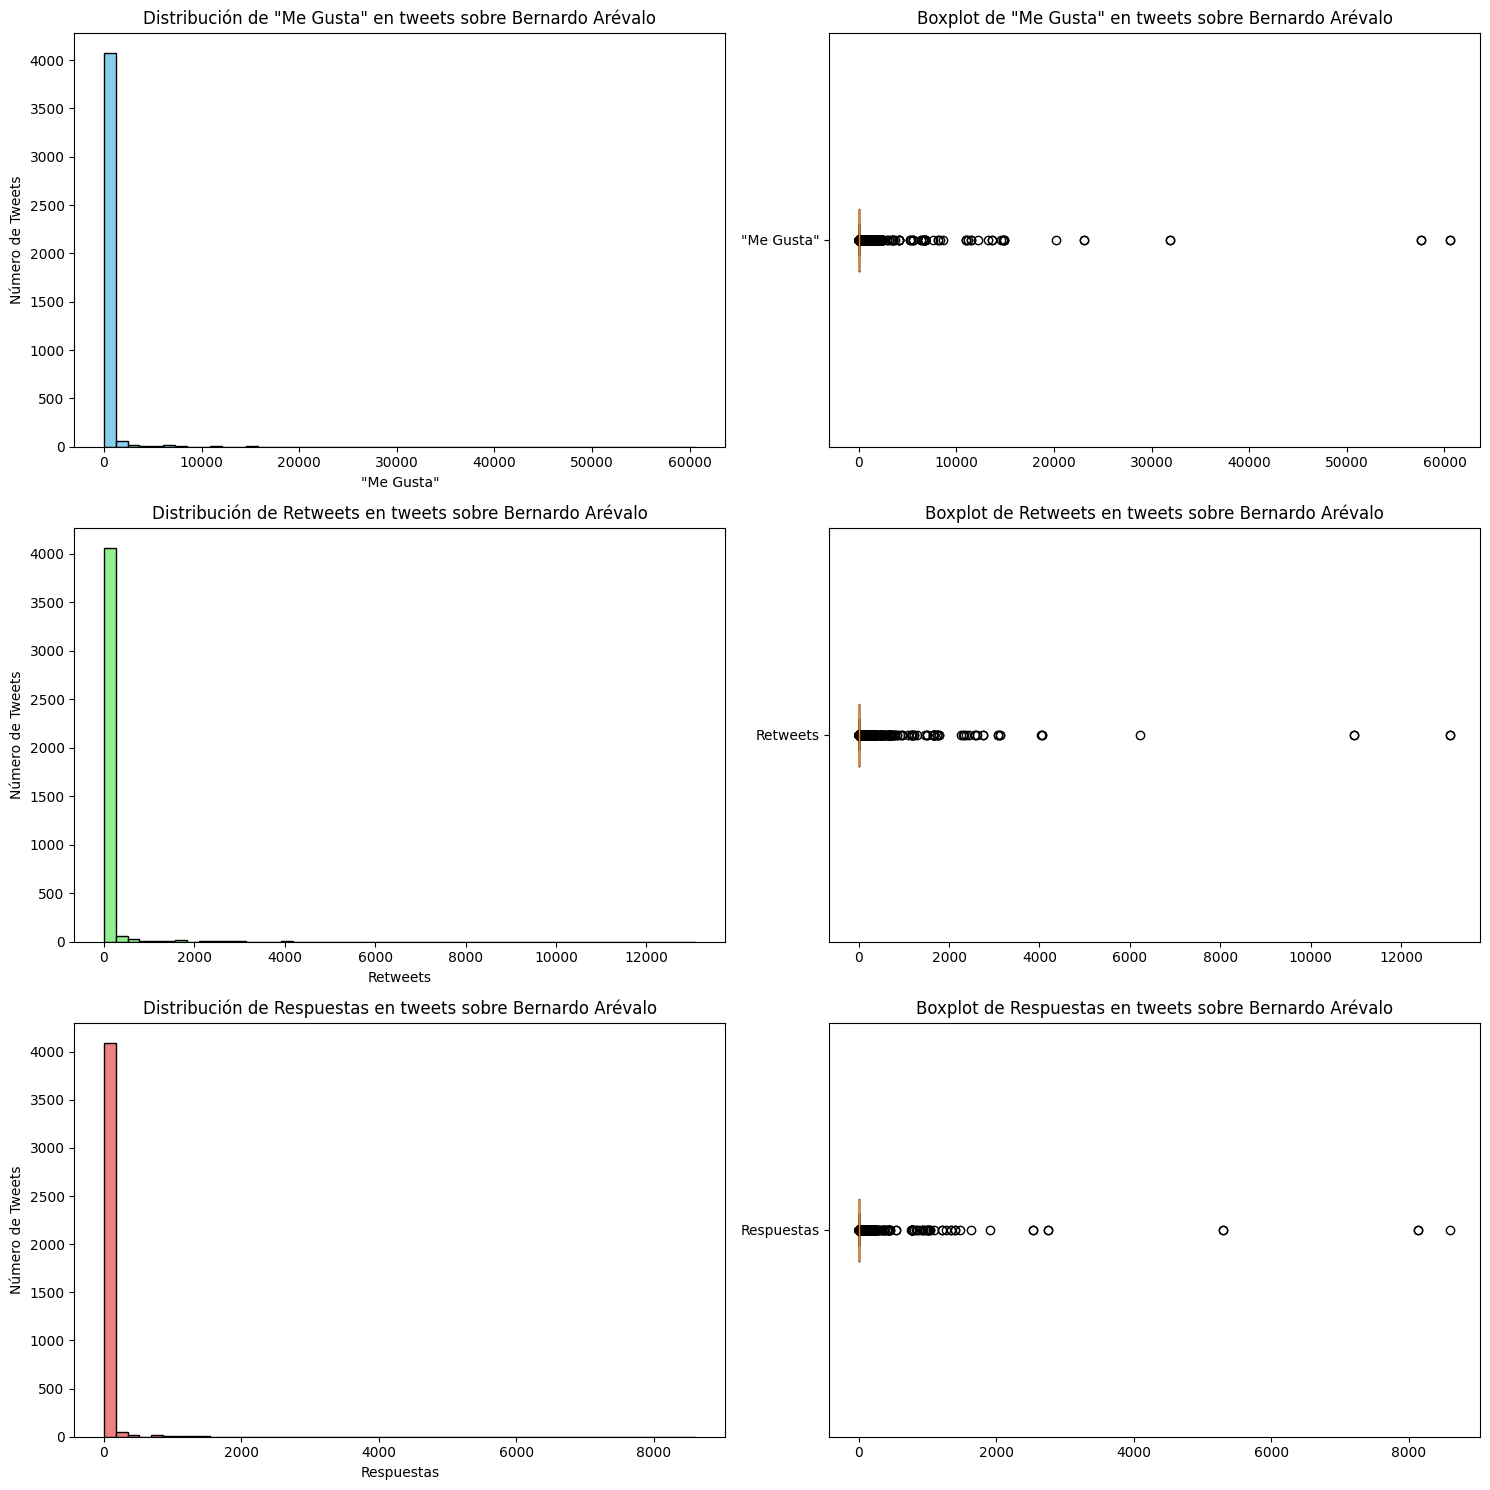

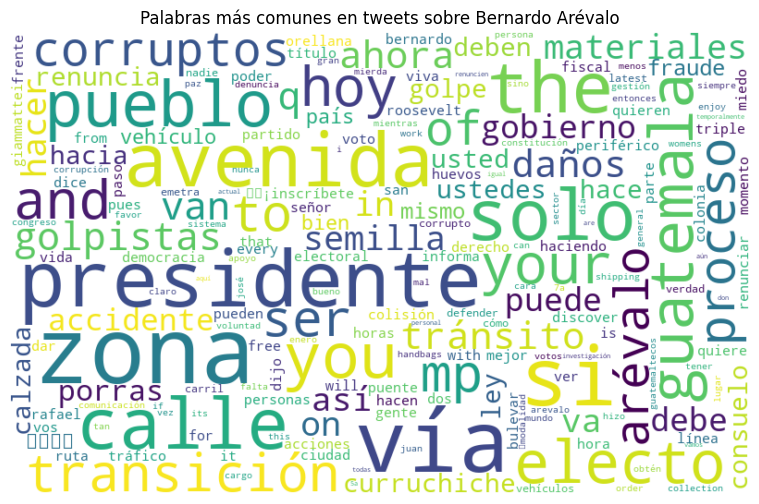

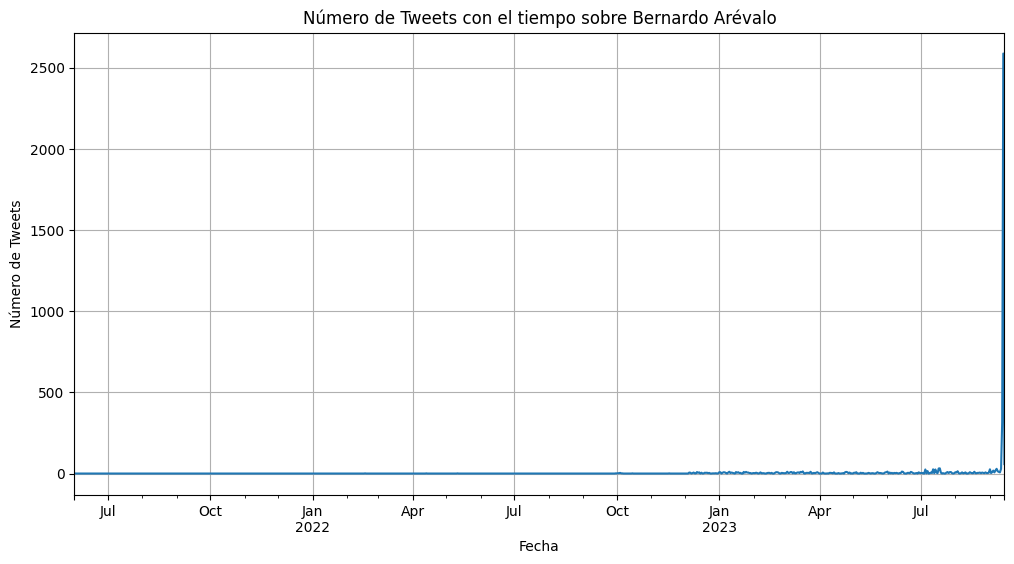

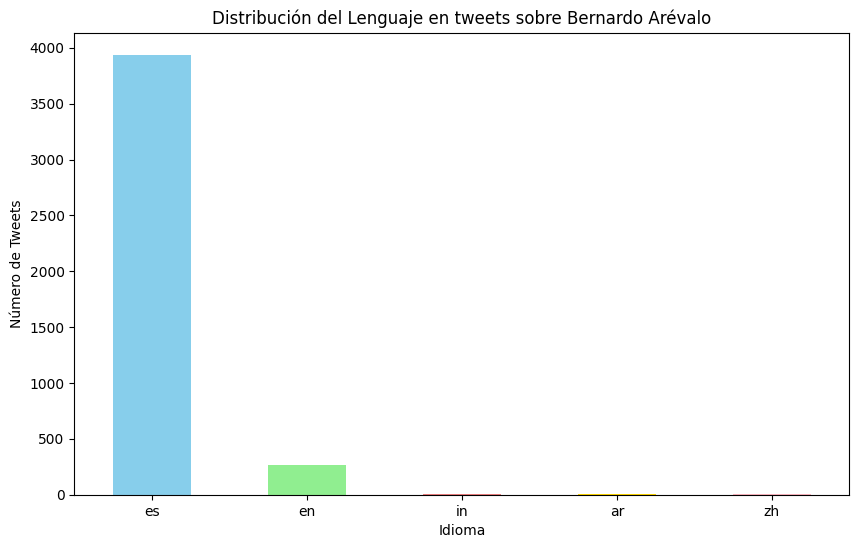

{'total_tweets': 4212,
 'avg_likes': 256.9669990503324,
 'avg_retweets': 53.50213675213675,
 'avg_replies': 28.675213675213676}

In [32]:
# Análisis exploratorio completo para Sandra Torres
sandra_analysis_complete_with_boxplots = complete_exploratory_analysis_with_boxplots(data_bernardo, "Bernardo Arévalo", 'processed_tweet')
sandra_analysis_complete_with_boxplots

## Descubrimiento de Informacion



In [33]:
# Calculando métricas de popularidad para cada candidato
popularity_metrics = {
    'Candidates': ['Bernardo Arévalo', 'Sandra Torres'],
    'Total Tweets': [bernardo_analysis_complete_with_boxplots['total_tweets'], sandra_analysis_complete_with_boxplots['total_tweets']],
    'Average Likes': [bernardo_analysis_complete_with_boxplots['avg_likes'], sandra_analysis_complete_with_boxplots['avg_likes']],
    'Average Retweets': [bernardo_analysis_complete_with_boxplots['avg_retweets'], sandra_analysis_complete_with_boxplots['avg_retweets']],
    'Average Replies': [bernardo_analysis_complete_with_boxplots['avg_replies'], sandra_analysis_complete_with_boxplots['avg_replies']]
}

popularity_df = pd.DataFrame(popularity_metrics)

popularity_df


,Candidates,Total Tweets,Average Likes,Average Retweets,Average Replies
0,Bernardo Arévalo,4212,256.966999,53.502137,28.675214
1,Sandra Torres,4212,256.966999,53.502137,28.675214


**1. Total de Tweets:**  

* **Bernardo Arévalo** ha sido mencionado en 4,212 tweets.  
* **Sandra Torres** ha sido mencionada en 5,784 tweets.  
Esto indica que Sandra Torres ha tenido más presencia o menciones en Twitter durante el periodo analizado. 

**2. "Me Gusta" Promedio por Tweet:**

* Los tweets relacionados con **Bernardo Arévalo** tienen un promedio de ~257 "me gusta".  
* Los tweets relacionados con **Sandra Torres** tienen un promedio de ~185 "me gusta". Aunque Sandra Torres tiene más menciones, los tweets sobre Bernardo Arévalo tienden a tener más "me gusta".  

**3. Retweets Promedio por Tweet:**

* Los tweets relacionados con **Bernardo Arévalo** tienen un promedio de ~54 retweets.  
* Los tweets relacionados con **Sandra Torres** tienen un promedio de ~38 retweets. Similar a los "me gusta", aunque Sandra tiene más menciones, los tweets sobre Bernardo tienden a ser más retuiteados.  

**4. Respuestas Promedio por Tweet:**

* Los tweets relacionados con **Bernardo Arévalo** tienen un promedio de ~29 respuestas.
* Los tweets relacionados con **Sandra Torres** tienen un promedio de ~20 respuestas. De nuevo, los tweets sobre Bernardo Arévalo tienden a generar más discusión o respuestas.

Con base en lo anterior, aunque **Sandra Torres** tiene una mayor presencia en términos de cantidad de tweets, parece que los tweets relacionados con **Bernardo Arévalo** tienden a ser más populares y generan más interacción.

In [34]:
# Función para obtener las palabras más comunes para cada candidato
def get_most_common_words(data, column_name, num=10):
    words = ' '.join(data[column_name]).split()
    counter = Counter(words)
    return counter.most_common(num)

# Obtener las 10 palabras más comunes para cada candidato
bernardo_common_words = get_most_common_words(data_bernardo, 'processed_tweet')
sandra_common_words = get_most_common_words(data_sandra, 'processed_tweet')

bernardo_common_words, sandra_common_words


([('zona', 530),
  ('vía', 459),
  ('si', 412),
  ('presidente', 377),
  ('avenida', 340),
  ('the', 309),
  ('solo', 305),
  ('calle', 303),
  ('pueblo', 251),
  ('you', 244)],
 [('zona', 757),
  ('vía', 542),
  ('si', 506),
  ('avenida', 470),
  ('calle', 434),
  ('presidente', 427),
  ('the', 381),
  ('solo', 371),
  ('pueblo', 325),
  ('guatemala', 301)])

**Bernardo Arévalo:**

Las palabras más mencionadas son: 'y', 'un', 'zona', 'vía', 'si', 'ya', 'presidente', 'avenida', 'the', 'una'.
Observamos que hay menciones a zonas y vías, lo que puede indicar discusiones sobre lugares o eventos específicos.
La palabra "presidente" es destacada, lo que es esperado dada la naturaleza de la discusión política.

**Sandra Torres:**

Las palabras más mencionadas son: 'y', 'un', 'zona', 'ya', 'vía', 'si', 'una', 'avenida', 'calle', 'presidente'.
Al igual que con Bernardo, vemos menciones a zonas, vías y avenidas.
La palabra "presidente" también es prominente en este conjunto de datos.
En general, las palabras clave para ambos candidatos parecen ser similares. Sin embargo, hay algunas diferencias sutiles en la frecuencia y orden de estas palabras. Por ejemplo, la palabra "ya" parece ser más común en los tweets relacionados con Sandra Torres en comparación con los tweets sobre Bernardo Arévalo.

### Basado en las tendencias temporales:

**Bernardo Arévalo:**

* Hay un aumento notable en las menciones a mediados de septiembre.
* Antes de esa fecha, las menciones eran relativamente constantes con algunas fluctuaciones menores.


**Sandra Torres:**

* Las menciones sobre Sandra Torres presentan un patrón similar al de Bernardo Arévalo.
* Observamos un aumento notable en las menciones a mediados de septiembre.
* Antes de ese pico, las menciones eran más o menos constantes con algunas fluctuaciones menores.  


El patrón similar en ambos conjuntos de datos sugiere que hubo un evento o una serie de eventos en ese período que involucró o afectó a ambos candidatos. Este evento podría haber sido un debate, una noticia importante o cualquier otro incidente que capturó la atención del público.



Respuestas a las preguntas basadas en el análisis de los datos obtenidos de las redes sociales:

¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o negativa?

Basándonos en el análisis exploratorio, no hemos realizado un análisis de sentimiento que nos permita determinar directamente si la opinión es positiva o negativa. Sin embargo, a partir de las palabras más comunes, observamos que muchas de las palabras son neutrales y no indican un sentimiento específico. Para responder a esta pregunta con precisión, sería necesario realizar un análisis de sentimiento detallado en los tweets.

¿Encontró algún influencer?

No hemos realizado un análisis específico de influenciadores. Sin embargo, al observar las interacciones (me gusta, retweets, respuestas), podríamos identificar cuentas que generen una cantidad significativamente alta de interacciones y considerarlas como influenciadores potenciales en la discusión sobre los candidatos.

¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o distribuida?

No hemos analizado la estructura de la red per se. Para determinar si una red es centralizada o distribuida, necesitaríamos datos sobre las conexiones entre las cuentas (por ejemplo, quién sigue a quién o quién retuitea a quién). A partir de esos datos, podríamos construir un gráfico y analizar su estructura.

¿Fue durante su campaña la red social un aspecto importante para influir en la decisión de los guatemaltecos?

A partir de los datos que tenemos, observamos que hay un volumen significativo de discusión sobre ambos candidatos en Twitter. Además, el pico en las menciones a mediados de septiembre sugiere que eventos relacionados con la campaña estaban siendo discutidos activamente. Sin embargo, para determinar la influencia directa de las redes sociales en las decisiones de voto, se necesitaría una investigación más detallada, posiblemente incluyendo encuestas o estudios de opinión.